In [14]:
from matplotlib import image as img
import PIL
import scipy
from matplotlib import pyplot as plt
%matplotlib inline


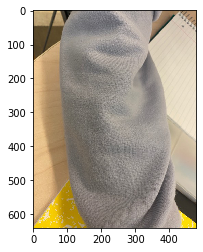

In [54]:
# Using this image
raw_image = img.imread('img2.jpg')

plt.imshow(raw_image)
plt.show()


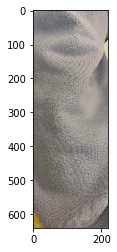

In [56]:
# reduce image
image = [i[130:350] for i in raw_image]

plt.imshow(image)
plt.show()

In [57]:
r = []
g = []
b = []
for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
    r.append(temp_r)
    g.append(temp_g)
    b.append(temp_b)

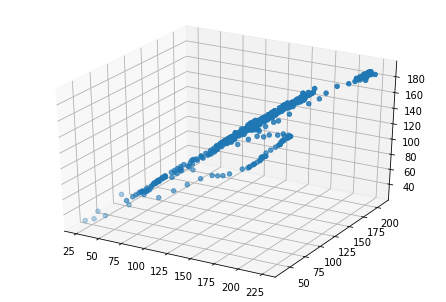

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [59]:
import pandas as pd
df = pd.DataFrame({'red': r,
'blue': b,
'green': g})

In [60]:
from scipy.cluster.vq import whiten
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])
df.sample(n = 10)

,red,blue,green,scaled_red,scaled_blue,scaled_green
283,141,135,135,4.094061,4.579771,4.164737
231,134,128,128,3.890809,4.342302,3.948788
81,33,39,49,0.958184,1.323045,1.511645
425,159,153,153,4.616707,5.190408,4.720035
631,116,108,111,3.368163,3.663817,3.424339
69,150,91,119,4.355384,3.087105,3.671139
421,164,158,158,4.761886,5.360029,4.874285
205,140,131,135,4.065025,4.444074,4.164737
551,151,139,141,4.384419,4.715468,4.349836
534,160,149,150,4.645742,5.054711,4.627486


In [65]:
from scipy.cluster.vq import kmeans
cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], 1)

print(cluster_centers)

[[4.16873718 4.18903137 4.42191766]]


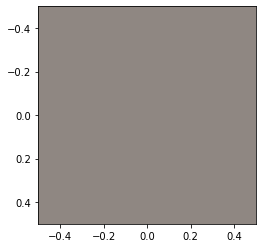

In [66]:
colors = []
r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    colors.append((
    scaled_r * r_std / 255,
    scaled_g * g_std / 255,
    scaled_b * b_std / 255
    ))
plt.imshow([colors])
plt.show()

In [96]:
# hex_rgb code
print('rgb: {0}{1}{2}'.format(*['{:02x}'.format(int(round(255*i))) for i in colors[0]]))



rgb: 908882


# Conclusion:
According to this website:https://www.color-blindness.com/color-name-hue/

This color is 'Heathered Grey'
